# Density Matrix and Path Integral

--------------------

* Naive Harmonic Path

In [1]:
import math, random

def rho_free(x, y, beta):    # free off-diagonal density matrix
    return math.exp(-(x - y) ** 2 / (2.0 * beta)) 

beta = 4.0
N = 8                                             # number of slices
dtau = beta / N
delta = 1.0                                       # maximum displacement on one slice
n_steps = 10                                 # number of Monte Carlo steps
x = [0.0] * N                                     # initial path
for step in range(n_steps):
    k = random.randint(0, N - 1)                  # random slice
    knext, kprev = (k + 1) % N, (k - 1) % N       # next/previous slices
    x_new = x[k] + random.uniform(-delta, delta)  # new position at slice k
    old_weight  = (rho_free(x[knext], x[k], dtau) *
                   rho_free(x[k], x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x[k] ** 2))
    new_weight  = (rho_free(x[knext], x_new, dtau) *
                   rho_free(x_new, x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x_new ** 2))
    if random.uniform(0.0, 1.0) < new_weight / old_weight:
        x[k] = x_new
    print x


[0.0, 0.0, 0.0, -0.9503347336313315, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, -0.9503347336313315, 0.0, 0.0, 0.0, 0.0]
[-0.1902541007130032, 0.0, 0.0, -0.9503347336313315, 0.0, 0.0, 0.0, 0.0]
[0.3502387271176708, 0.0, 0.0, -0.9503347336313315, 0.0, 0.0, 0.0, 0.0]
[0.3502387271176708, 0.0, 0.0, -0.9503347336313315, 0.0, 0.0, 0.0, 0.0]
[0.3502387271176708, 0.0, 0.0, -0.9503347336313315, 0.0, 0.0, 0.0, 0.0]
[0.3502387271176708, 0.0, 0.0, -0.9503347336313315, 0.0, 0.0, 0.0, 0.0]
[0.3502387271176708, 0.0, 0.0, -0.9503347336313315, 0.0, -0.2691021744359521, 0.0, 0.0]
[0.3502387271176708, 0.0, 0.0, -0.9503347336313315, 0.0, -0.2691021744359521, -0.05409984381515698, 0.0]
[0.3502387271176708, 0.0, 0.0, -0.9503347336313315, 0.0, -0.2691021744359521, -0.05409984381515698, 0.0]


* Naive Harmonic Path Movie

In [3]:
%matplotlib inline

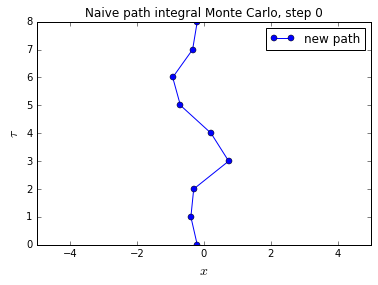

step 0


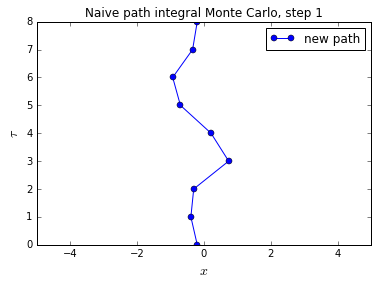

step 1


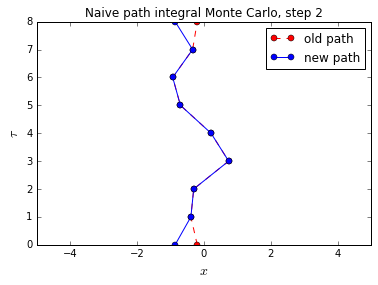

step 2


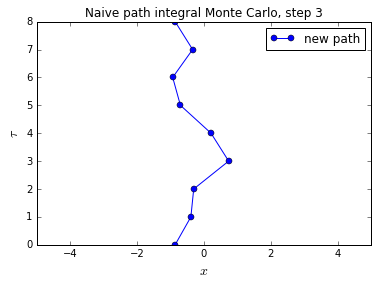

step 3


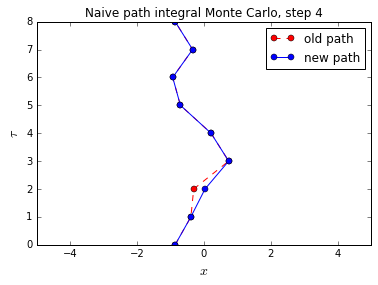

In [5]:
import math, random, pylab, os

def rho_free(x, y, beta):        # free off-diagonal density matrix
    return math.exp(-(x - y) ** 2 / (2.0 * beta))

output_dir = 'snapshots_naive_harmonic_path'
if not os.path.exists(output_dir): os.makedirs(output_dir)
def show_path(x, k, x_old, Accepted, step):
    path = x + [x[0]]
    y_axis = range(len(x) + 1)
    if Accepted:
        old_path = x[:]
        old_path[k] = x_old
        old_path = old_path + [old_path[0]]
        pylab.plot(old_path, y_axis, 'ro--', label='old path')
    pylab.plot(path, y_axis, 'bo-', label='new path')
    pylab.legend()
    pylab.xlim(-5.0, 5.0)
    pylab.xlabel('$x$', fontsize=14)
    pylab.ylabel('$\\tau$', fontsize=14)
    pylab.title('Naive path integral Monte Carlo, step %i' % step)
    #pylab.savefig(output_dir + '/snapshot_%05i.png' % step)
    #pylab.clf()
    pylab.show()

beta = 4.0
N = 8                                                # number of slices
dtau = beta / N
delta = 1.0                                          # maximum displacement on one slice
n_steps = 4                                        # number of Monte Carlo steps
x = [random.uniform(-1.0, 1.0) for k in range(N)]   # initial path
show_path(x, 0, 0.0, False, 0)
for step in range(n_steps):
    print 'step',step
    k = random.randint(0, N - 1)                     # randomly choose slice
    knext, kprev = (k + 1) % N, (k - 1) % N          # next/previous slices
    x_old = x[k]
    x_new = x[k] + random.uniform(-delta, delta)     # new position at slice k
    old_weight  = (rho_free(x[knext], x_old, dtau) *
                   rho_free(x_old, x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x_old ** 2))
    new_weight  = (rho_free(x[knext], x_new, dtau) *
                   rho_free(x_new, x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x_new ** 2))
    if random.uniform(0.0, 1.0) < new_weight / old_weight:
        x[k] = x_new
        Accepted = True
    else:
        Accepted = False
    show_path(x, k, x_old, Accepted, step + 1)


* Matrix Square Harmonic 

In [6]:
import math, numpy

# Free off-diagonal density matrix
def rho_free(x, xp, beta):
    return (math.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            math.sqrt(2.0 * math.pi * beta))

# Harmonic density matrix in the Trotter approximation (returns the full matrix)
def rho_harmonic_trotter(grid, beta):
    return numpy.array([[rho_free(x, xp, beta) * \
                         numpy.exp(-0.5 * beta * 0.5 * (x ** 2 + xp ** 2)) \
                         for x in grid] for xp in grid])

x_max = 5.0                              # the x range is [-x_max,+x_max]
nx = 100
dx = 2.0 * x_max / (nx - 1)
x = [i * dx for i in range(-(nx - 1) / 2, nx / 2 + 1)]
beta_tmp = 2.0 ** (-5)                   # initial value of beta (power of 2)
beta     = 2.0 ** 4                      # actual value of beta (power of 2)
rho = rho_harmonic_trotter(x, beta_tmp)  # density matrix at initial beta
while beta_tmp < beta:
    rho = numpy.dot(rho, rho)
    rho *= dx
    beta_tmp *= 2.0
    print 'beta: %s -> %s' % (beta_tmp / 2.0, beta_tmp)

beta: 0.03125 -> 0.0625
beta: 0.0625 -> 0.125
beta: 0.125 -> 0.25
beta: 0.25 -> 0.5
beta: 0.5 -> 1.0
beta: 1.0 -> 2.0
beta: 2.0 -> 4.0
beta: 4.0 -> 8.0
beta: 8.0 -> 16.0


* Matrix Square Harmonic Movie

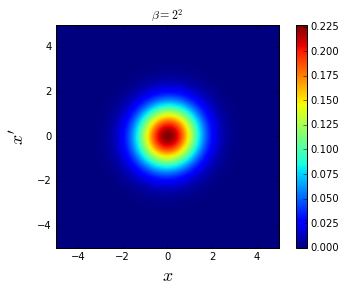

In [7]:
import math, numpy, pylab

# Free off-diagonal density matrix
def rho_free(x, xp, beta):
    return (math.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            math.sqrt(2.0 * math.pi * beta))

# Harmonic density matrix in the Trotter approximation (returns the full matrix)
def rho_harmonic_trotter(grid, beta):
    return numpy.array([[rho_free(x, xp, beta) * \
                         numpy.exp(-0.5 * beta * 0.5 * (x ** 2 + xp ** 2)) \
                         for x in grid] for xp in grid])

x_max = 5.0                              # the x range is [-x_max,+x_max]
nx = 100
dx = 2.0 * x_max / (nx - 1)
x = [i * dx for i in range(-(nx - 1) / 2, nx / 2 + 1)] 
beta_tmp = 2.0 ** (-8)                   # initial value of beta (power of 2)
beta     = 2.0 ** 2                      # actual value of beta (power of 2)
rho = rho_harmonic_trotter(x, beta_tmp)  # density matrix at initial beta
while beta_tmp < beta:
    rho = numpy.dot(rho, rho)
    rho *= dx
    beta_tmp *= 2.0

# graphics output
pylab.imshow(rho, extent=[-x_max, x_max, -x_max, x_max], origin='lower')
pylab.colorbar()
pylab.title('$\\beta = 2^{%i}$' % math.log(beta, 2))
pylab.xlabel('$x$', fontsize=18)
pylab.ylabel('$x\'$', fontsize=18)
#pylab.savefig('plot-harmonic-rho.png')
pylab.show()


* Harmonic Wave Function

In [8]:
import math

n_states = 4
grid_x = [i * 0.2 for i in range(-25, 26)]
psi = {}
for x in grid_x:
    psi[x] = [math.exp(-x ** 2 / 2.0) / math.pi ** 0.25]  # ground state
    psi[x].append(math.sqrt(2.0) * x * psi[x][0])         # first excited state
    # other excited states (through recursion):
    for n in range(2, n_states):
        psi[x].append(math.sqrt(2.0 / n) * x * psi[x][n - 1] -
                      math.sqrt((n - 1.0) / n) * psi[x][n - 2])
for n in range(n_states):
    print 'level %i:' % n, [psi[x][n] for x in grid_x]


level 0: [2.7991843929095964e-06, 7.458304327999357e-06, 1.9093120491923166e-05, 4.696149856362874e-05, 0.00011097756752308872, 0.0002519745490309146, 0.0005496754903223565, 0.0011520843816137305, 0.002320013042709098, 0.004488743450746296, 0.008344251073246413, 0.014903153092645628, 0.025573912975171406, 0.042164254297199076, 0.06679129832888486, 0.10165378830641791, 0.14864676809808386, 0.2088409186844682, 0.2819057534684933, 0.3656120532774727, 0.4555806720113325, 0.5454290908346697, 0.6273927923216392, 0.6933762682841502, 0.7362522621713508, 0.7511255444649425, 0.7362522621713508, 0.6933762682841502, 0.6273927923216392, 0.5454290908346697, 0.4555806720113325, 0.3656120532774727, 0.2819057534684933, 0.2088409186844682, 0.14864676809808386, 0.10165378830641791, 0.06679129832888486, 0.042164254297199076, 0.025573912975171406, 0.014903153092645628, 0.008344251073246413, 0.004488743450746296, 0.002320013042709098, 0.0011520843816137305, 0.0005496754903223565, 0.0002519745490309146, 0.00

* Harmonic Wave Function Movie

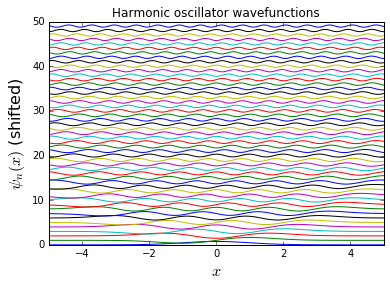

In [9]:
import math, pylab

n_states = 50
grid_x = [i * 0.1 for i in range(-50, 51)]
psi = {}
for x in grid_x:
    psi[x] = [math.exp(-x ** 2 / 2.0) / math.pi ** 0.25]  # ground state
    psi[x].append(math.sqrt(2.0) * x * psi[x][0])         # first excited state
    # other excited states (through recursion):
    for n in range(2, n_states):
        psi[x].append(math.sqrt(2.0 / n) * x * psi[x][n - 1] -
                      math.sqrt((n - 1.0) / n) * psi[x][n - 2])

# graphics output
for n in range(n_states):
    shifted_psi = [psi[x][n] + n  for x in grid_x]  # vertical shift
    pylab.plot(grid_x, shifted_psi)
pylab.title('Harmonic oscillator wavefunctions')
pylab.xlabel('$x$', fontsize=16)
pylab.ylabel('$\psi_n(x)$ (shifted)', fontsize=16)
pylab.xlim(-5.0, 5.0)
#pylab.savefig('plot-harmonic_wavefunction.png')
pylab.show()


* Harmonic Wave Function Check

In [10]:
import math

def orthonormality_check(n, m):
    integral_n_m = sum(psi[n][i] * psi[m][i] for i in range(nx)) * dx
    return integral_n_m

nx = 10
L = 10.0
dx = L / (nx - 1)
x = [- L / 2.0 + i * dx for i in range(nx)]
n_states = 4
psi = [[math.exp(-x[i] ** 2 / 2.0) / math.pi ** 0.25 for i in range(nx)]]  
psi.append([math.sqrt(2.0) * x[i] * psi[0][i] for i in range(nx)])         
for n in range(2, n_states):
    psi.append([math.sqrt(2.0 / n) * x[i] * psi[n - 1][i] - \
                math.sqrt((n - 1.0) / n) * psi[n - 2][i] for i in range(nx)])
n = n_states - 1
print 'checking energy level', n
H_psi = [0.0] +  [(- 0.5 * (psi[n][i + 1] - 2.0 * psi[n][i] + psi[n][i - 1]) /
          dx ** 2 + 0.5 * x[i] ** 2 * psi[n][i]) for i in range(1, nx - 1)]
for i in range(1, nx - 1):  
    print n, x[i],  H_psi[i] / psi[n][i]


checking energy level 3
3 -3.88888888889 3.00668022555
3 -2.77777777778 4.04737813751
3 -1.66666666667 2.35349806276
3 -0.555555555556 1.7484816623
3 0.555555555556 1.7484816623
3 1.66666666667 2.35349806276
3 2.77777777778 4.04737813751
3 3.88888888889 3.00668022555


* Harmonic Wave Function Check Movie

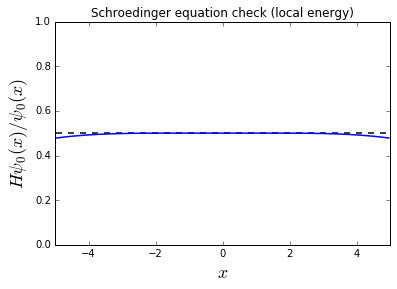

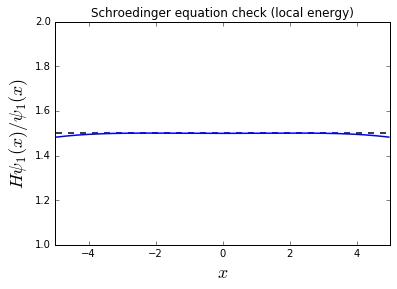

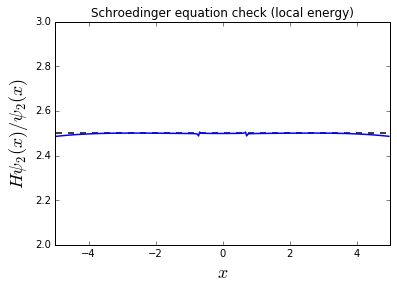

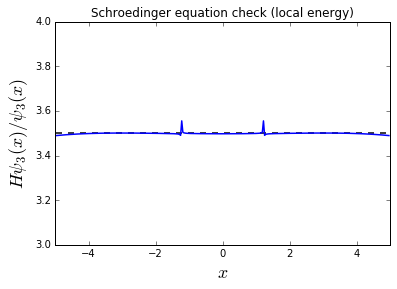

In [11]:
import math, pylab

nx = 300  # nx is even, to avoid division by zero
L = 10.0
dx = L / (nx - 1)
x = [- L / 2.0 + i * dx for i in range(nx)]
# construct wavefunctions:
n_states = 4
psi = [[math.exp(-x[i] ** 2 / 2.0) / math.pi ** 0.25 for i in range(nx)]]  # ground state
psi.append([math.sqrt(2.0) * x[i] * psi[0][i] for i in range(nx)])         # first excited state
for n in range(2, n_states):
    psi.append([math.sqrt(2.0 / n) * x[i] * psi[n - 1][i] - \
                math.sqrt((n - 1.0) / n) * psi[n - 2][i] for i in range(nx)])
# local energy check:
H_psi_over_psi = []
for n in range(n_states):
    H_psi = [(- 0.5 * (psi[n][i + 1] - 2.0 * psi[n][i] + psi[n][i - 1])
             / dx ** 2 + 0.5 * x[i] ** 2 * psi[n][i]) for i in range(1, nx - 1)]
    H_psi_over_psi.append([H_psi[i] / psi[n][i+1] for i in range(nx - 2)])

# graphics output:
for n in range(n_states):
    pylab.plot(x[1:-1], [n + 0.5 for i in x[1:-1]], 'k--', lw=1.5)
    pylab.plot(x[1:-1], H_psi_over_psi[n], '-', lw=1.5)
    pylab.xlabel('$x$', fontsize=18)
    pylab.ylabel('$H \psi_%i(x)/\psi_%i(x)$' % (n, n), fontsize=18)
    pylab.xlim(x[0], x[-1])
    pylab.ylim(n, n + 1)
    pylab.title('Schroedinger equation check (local energy)')
    #pylab.savefig('plot-check_schroedinger_energy-%i.png' % n)
    pylab.show()


# TUTORIAL

-----------------------

* Free Periodic Complex Exp

In [13]:
import math, cmath

ntot = 21   # odd number
beta = 1.0
nx = 100
L = 10.0
x = [i * L / float(nx - 1) for i in range(nx)]
rho_complex = []
for i in range(nx):
    rho_complex.append([sum(
              math.exp(- 2.0 * beta * (math.pi * n / L) ** 2) *
              cmath.exp(1j * 2.0 * n * math.pi * (x[i] - x[j]) / L) / L
              for n in range(-(ntot - 1) / 2, (ntot + 1) / 2))
              for j in range(nx)])
rho_real = [[rho_complex[i][j].real for i in range(nx)] for j in range(nx)]


* Free Periodic Complex Movie

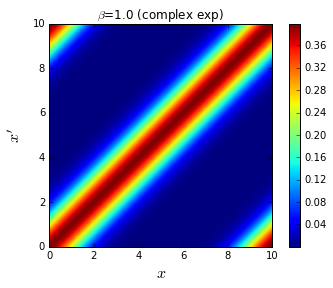

In [14]:
import math, cmath, pylab

ntot = 21   # odd number
beta = 1.0
nx = 100
L = 10.0
x = [i * L / float(nx - 1) for i in range(nx)]
rho_complex = []
for i in range(nx):
    rho_complex.append([sum(
              math.exp(- 2.0 * beta * (math.pi * n / L) ** 2) *
              cmath.exp(1j * 2.0 * n * math.pi * (x[i] - x[j]) / L) / L
              for n in range(-(ntot - 1) / 2, (ntot + 1) / 2))
              for j in range(nx)])
rho_real = [[rho_complex[i][j].real for i in range(nx)] for j in range(nx)]

# graphics output
pylab.imshow(rho_real, extent=[0.0, L, 0.0, L], origin='lower')
pylab.colorbar()
pylab.title('$\\beta$=%s (complex exp)' % beta)
pylab.xlabel('$x$', fontsize=16)
pylab.ylabel('$x\'$', fontsize=16)
#pylab.savefig('plot-periodic-complex.png')
pylab.show()

* Periodic Sine Cosine

In [15]:
import math

# simmetric wavefunctions
def psi_s(x, L, n):
    return math.sqrt(2.0 / L) * math.cos(2.0 * n * math.pi * x / L)

# antysimmetric wavefunctions
def psi_a(x, L, n):
    return math.sqrt(2.0 / L) * math.sin(2.0 * n * math.pi * x / L)

ntot = 21     # odd number
beta = 1.0
nx = 100
L = 10.0
x = [i * L / float(nx - 1) for i in range(nx)]
rho = []
for i in range(nx):
    rho.append([1.0 / L + sum(
              math.exp(- beta * 2.0 * (math.pi * n / L) ** 2) *
              (psi_s(x[i], L, n) * psi_s(x[j], L, n) + 
              psi_a(x[i], L, n) * psi_a(x[j], L, n) )
              for n in range(1, (ntot + 1) / 2))
              for j in range(nx)])


* Periodic Sine Cosine Movie

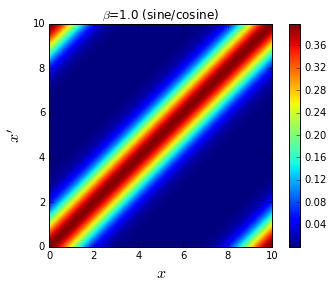

In [16]:
import math, pylab

# simmetric wavefunctions
def psi_s(x, L, n):
    return math.sqrt(2.0 / L) * math.cos(2.0 * n * math.pi * x / L)

# antysimmetric wavefunctions
def psi_a(x, L, n):
    return math.sqrt(2.0 / L) * math.sin(2.0 * n * math.pi * x / L)

ntot = 21     # odd number
beta = 1.0
nx = 100
L = 10.0
x = [i * L / float(nx - 1) for i in range(nx)]
rho = []
for i in range(nx):
    rho.append([1.0 / L + sum(
              math.exp(- beta * 2.0 * (math.pi * n / L) ** 2) *
              (psi_s(x[i], L, n) * psi_s(x[j], L, n) + 
              psi_a(x[i], L, n) * psi_a(x[j], L, n) )
              for n in range(1, (ntot + 1) / 2))
              for j in range(nx)])

# graphics output
pylab.imshow(rho, extent=[0.0, L, 0.0, L], origin='lower')
pylab.colorbar()
pylab.title('$\\beta$=%s (sine/cosine)' % beta)
pylab.xlabel('$x$', fontsize=16)
pylab.ylabel('$x\'$', fontsize=16)
#pylab.savefig('plot-periodic-sine_cosine.png')
pylab.show()

* Quantum Time Evolution

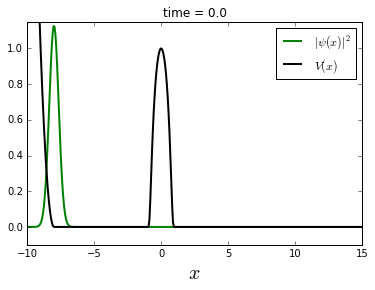

0.0
0.1
0.2
0.3


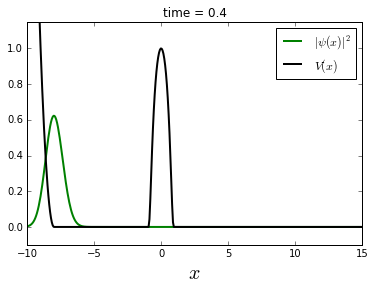

0.4
0.5
0.6
0.7


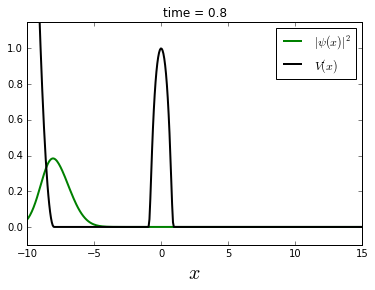

0.8
0.9
1.0


In [20]:
import numpy, pylab, os

def fourier_x_to_p(phi_x, dx):
    phi_p = [(phi_x * numpy.exp(-1j * p * grid_x)).sum() * dx for p in grid_p]
    return numpy.array(phi_p)

def fourier_p_to_x(phi_p, dp):
    phi_x = [(phi_p * numpy.exp(1j * x * grid_p)).sum() for x in grid_x]
    return numpy.array(phi_x) /  (2.0 * numpy.pi)

def time_step_evolution(psi0, potential, grid_x, grid_p, dx, dp, delta_t):
    psi0 = numpy.exp(-1j * potential * delta_t / 2.0) * psi0
    psi0 = fourier_x_to_p(psi0, dx)
    psi0 = numpy.exp(-1j * grid_p ** 2 * delta_t / 2.0) * psi0
    psi0 = fourier_p_to_x(psi0, dp)
    psi0 = numpy.exp(-1j * potential * delta_t / 2.0) * psi0
    psi0 /= (numpy.absolute(psi0 ** 2).sum() * dx)
    return psi0

def funct_potential(x):
    if x < -8.0:    return (x + 8.0) ** 2
    elif x <= -1.0: return 0.0
    elif x < 1.0:   return numpy.exp(-1.0 / (1.0 - x ** 2)) / numpy.exp(-1.0)
    else:           return 0.0

output_dir = 'snapshots_time_evolution'
if not os.path.exists(output_dir): os.makedirs(output_dir)
def show(x, psi, pot, time, timestep):
    pylab.plot(x, psi, 'g', linewidth = 2.0, label = '$|\psi(x)|^2$')
    pylab.xlim(-10, 15)
    pylab.ylim(-0.1, 1.15)
    pylab.plot(x, pot, 'k', linewidth = 2.0, label = '$V(x)$')
    pylab.xlabel('$x$', fontsize = 20)
    pylab.title('time = %s' % time)
    pylab.legend(loc=1)
    #pylab.savefig(output_dir + '/snapshot_%05i.png' % timestep)
    timestep += 1
    #pylab.clf()
    pylab.show()

steps = 800
x_min = -12.0
x_max = 40.0
grid_x = numpy.linspace(x_min, x_max, steps)
grid_p = numpy.linspace(x_min, x_max, steps)
dx  = grid_x[1] - grid_x[0]
dp  = grid_p[1] - grid_p[0]
delta_t = 0.1
t_max = 1.0

potential = [funct_potential(x) for x in grid_x]
potential = numpy.array(potential)
# initial state:
x0 = -8.0
sigma = .5
psi = numpy.exp(-(grid_x - x0) ** 2 / (2.0 * sigma ** 2) )
psi /= numpy.sqrt( sigma * numpy.sqrt( numpy.pi ) )
# time evolution
time = 0.0
timestep = 0
while time < t_max:
    if timestep % 4 == 0:
        show(grid_x, numpy.absolute(psi) ** 2.0, potential, time, timestep)
    print time
    time += delta_t
    timestep += 1
    psi = time_step_evolution(psi, potential, grid_x, grid_p, dx, dp, delta_t)


* Harmonic Totter

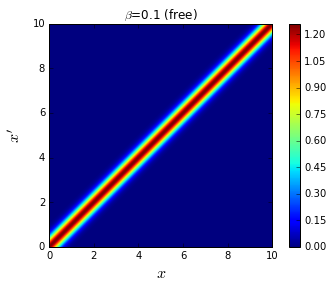

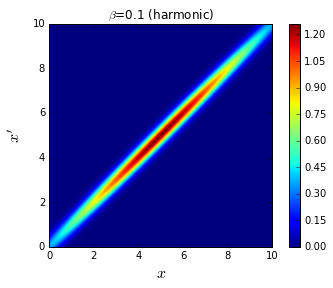

In [22]:
import math, pylab

# density matrix for a free particle (exact)
def funct_rho_free(x, xp, beta):
    return (math.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            math.sqrt(2.0 * math.pi * beta))

beta = 0.1
nx = 300
L = 10.0
x = [-L / 2.0 + i * L / float(nx - 1) for i in range(nx)]
rho_free, rho_harm = [], []
for i in range(nx):
    rho_free.append([funct_rho_free(x[i], x[j], beta) for j in range(nx)])
    rho_harm.append([rho_free[i][j] * math.exp(- beta * x[i] ** 2 / 4.0 -
                     beta * x[j] ** 2 / 4.0) for j in range(nx)])

# graphics output (free particle)
pylab.imshow(rho_free, extent=[0.0, L, 0.0, L], origin='lower')
pylab.xlabel('$x$', fontsize=16)
pylab.ylabel('$x\'$', fontsize=16)
pylab.colorbar()
pylab.title('$\\beta$=%s (free)' % beta)
#pylab.savefig('plot-trotter-free.png')
#pylab.clf()
pylab.show()
# graphics output (harmonic potential)
pylab.imshow(rho_harm, extent=[0.0, L, 0.0, L], origin='lower')
pylab.xlabel('$x$', fontsize=16)
pylab.ylabel('$x\'$', fontsize=16)
pylab.colorbar()
pylab.title('$\\beta$=%s (harmonic)' % beta)
#pylab.savefig('plot-trotter-harmonic.png')
pylab.show()